# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lon = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

# Create a set of random lat and lon combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lon = np.random.uniform(lon_range[0], lon_range[1], size=1500)
lat_lon = zip(lats, lon)

# Identify nearest city for each lat, lon combination
for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [38]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    if i >= 500:
        break
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Debugging:  Print the raw JSON response
        print(f"API Response for {city}")
        print(json.dumps(city_weather, indent=4))

        # Check if the request was successful
        if city_weather["cod"] != 200:
            print(f"City {city} not found. Skipping...")
            continue

        # Convert Unix timestamp to human-readable format
        city_date_unix = city_weather.get("dt", None)  # Get Timestamp
        
        if city_date_unix:
                city_date = datetime.utcfromtimestamp(city_date_unix).strftime('%Y-%m-%d %H:%M:%S')
        else:
                city_date = "Unknown"

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        print(f"Formatted Date for {city}: {city_date}")


        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": f"{city_lat}",
            "Lon": f"{city_lon}",
            "Max Temp": f"{city_max_temp}",
            "Humidity": f"{city_humidity}",
            "Cloudiness": f"{city_clouds}",
            "Wind Speed": f"{city_wind}",
            "Country": city_country,
            "Date": city_date
        })

    except Exception as e:
        print(f"Error processing city {city}. Skipping... Error: {e}")

    # Pause to avoid rate limiting
time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
API Response for grytviken
{
    "coord": {
        "lon": -36.5092,
        "lat": -54.2811
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 0.8,
        "feels_like": -4.64,
        "temp_min": 0.8,
        "temp_max": 0.8,
        "pressure": 1009,
        "humidity": 79,
        "sea_level": 1009,
        "grnd_level": 1005
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.44,
        "deg": 221,
        "gust": 7.6
    },
    "clouds": {
        "all": 62
    },
    "dt": 1737624280,
    "sys": {
        "country": "GS",
        "sunrise": 1737614020,
        "sunset": 1737672111
    },
    "timezone": -7200,
    "id": 3426466,
    "name": "Grytviken",
    "cod": 200
}
Formatted Date for gry

KeyboardInterrupt: 

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          484
Lat           484
Lon           484
Max Temp      484
Humidity      484
Cloudiness    484
Wind Speed    484
Country       484
Date          484
dtype: int64

In [15]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.53,80,60,6.66,GS,2025-01-23 08:08:21
1,howard springs,-12.497,131.047,32.95,81,100,2.07,AU,2025-01-23 08:08:21
2,georgetown,5.4112,100.3354,31.97,62,20,5.14,MY,2025-01-23 08:03:33
3,greymouth,-42.4667,171.2,16.55,91,57,1.41,NZ,2025-01-23 08:05:18
4,isafjordur,66.0755,-23.124,-5.98,79,0,1.03,IS,2025-01-23 08:08:22
5,boryeong,36.3493,126.5977,5.59,43,0,3.73,KR,2025-01-23 08:08:22
6,xam nua,20.4197,104.0439,29.09,19,22,2.01,LA,2025-01-23 08:08:22
7,bilibino,68.0546,166.4372,-28.15,97,100,2.34,RU,2025-01-23 08:08:22
8,adamstown,-25.066,-130.1015,24.75,83,13,5.45,PN,2025-01-23 08:08:23
9,port-aux-francais,-49.35,70.2167,5.4,98,100,15.08,TF,2025-01-23 08:08:23


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.53,80,60,6.66,GS,2025-01-23 08:08:21
1,howard springs,-12.4970,131.0470,32.95,81,100,2.07,AU,2025-01-23 08:08:21
2,georgetown,5.4112,100.3354,31.97,62,20,5.14,MY,2025-01-23 08:03:33
3,greymouth,-42.4667,171.2000,16.55,91,57,1.41,NZ,2025-01-23 08:05:18
4,isafjordur,66.0755,-23.1240,-5.98,79,0,1.03,IS,2025-01-23 08:08:22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

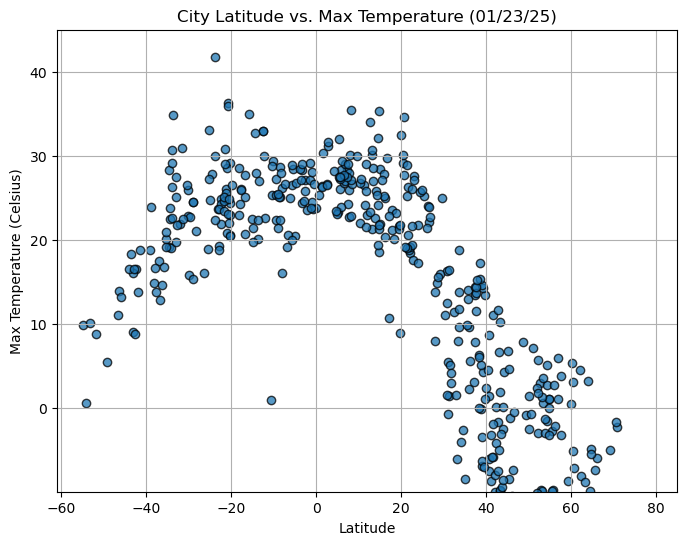

In [34]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlim(-61, 85)
plt.xticks(np.arange(-60, 81, 20))
plt.xlabel("Latitude")

plt.ylim(-10, 45)
plt.yticks(np.arange(0, 41, 10))
plt.ylabel("Max Temperature (Celsius)")

plt.title("City Latitude vs. Max Temperature (01/23/25)")
plt.grid(True)
marker ="o"

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

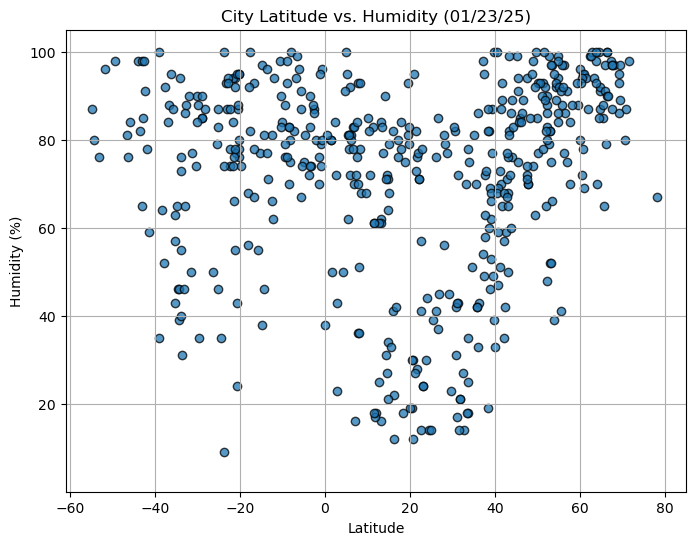

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlim(-61, 85)
plt.xticks(np.arange(-60, 81, 20))
plt.xlabel("Latitude")

plt.ylim(0, 105)
plt.yticks(np.arange(20, 101, 20))
plt.ylabel("Humidity (%)")

plt.title("City Latitude vs. Humidity (01/23/25)")
plt.grid(True)
marker ="o"

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

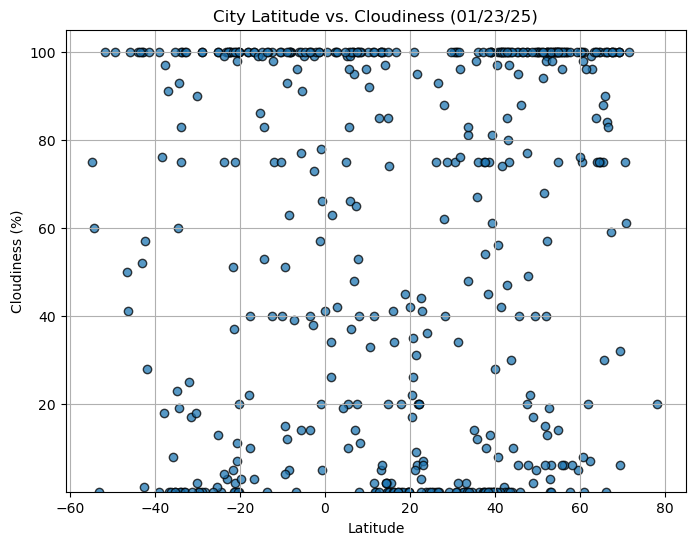

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlim(-61, 85)
plt.xticks(np.arange(-60, 81, 20))
plt.xlabel("Latitude")

plt.ylim(0, 105)
plt.yticks(np.arange(20, 101, 20))
plt.ylabel("Cloudiness (%)")

plt.title("City Latitude vs. Cloudiness (01/23/25)")
plt.grid(True)
marker ="o"

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

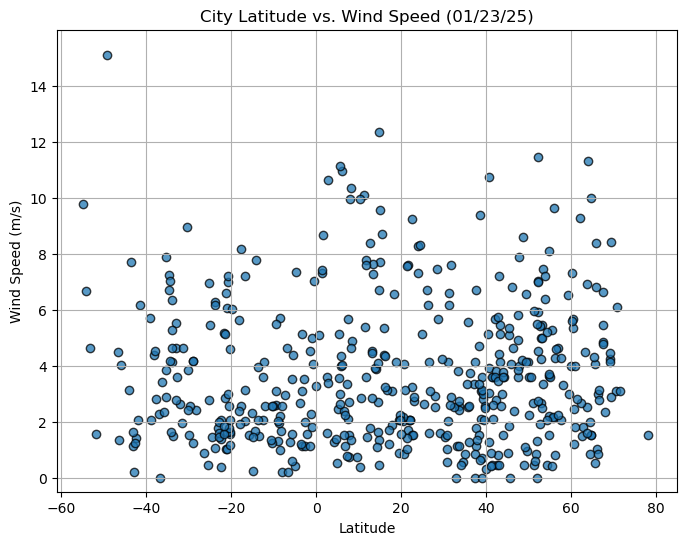

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlim(-61, 85)
plt.xticks(np.arange(-60, 81, 20))
plt.xlabel("Latitude")

plt.ylim(-.5, 16)
plt.yticks(np.arange(0, 15, 2))
plt.ylabel("Wind Speed (m/s)")

plt.title("City Latitude vs. Wind Speed (01/23/25)")
plt.grid(True)
marker ="o"

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, xlabel, ylabel, title):

    # Linear regression paramaters
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

    # Compute regression values
    regression_values = slope * x_value + intercept

    # Create the figure
    plt.figure(figsize=(8, 6))
    plt.scatter(x_value, y_value, edgecolors="black", alpha = 0.75, label="Data Points")

    # Plot regression line
    plt.plot(x_value, regression_values, color="red", linewidth=2, 
            label=f"Regression Line (y = {slope:.2f}x + {intercept:.2f})")
    
    # Display the regression equation on the plot
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}",
                 xy=(min(x_value), min(regression_values)),
                 xytext=(min(x_value) + 5, min(regression_values) + 5),
                 fontsize=12,
                 color="red",
                 fontweight="bold")

    # Add labels, title, legend, and grid
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)

    # Print R-squared value
    print(f"R-squared: {rvalue**2:.4f}")

    # Show Plot
    plt.show()

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,georgetown,5.4112,100.3354,31.97,62,20,5.14,MY,2025-01-23 08:03:33
4,isafjordur,66.0755,-23.1240,-5.98,79,0,1.03,IS,2025-01-23 08:08:22
5,boryeong,36.3493,126.5977,5.59,43,0,3.73,KR,2025-01-23 08:08:22
6,xam nua,20.4197,104.0439,29.09,19,22,2.01,LA,2025-01-23 08:08:22
7,bilibino,68.0546,166.4372,-28.15,97,100,2.34,RU,2025-01-23 08:08:22


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.53,80,60,6.66,GS,2025-01-23 08:08:21
1,howard springs,-12.4970,131.0470,32.95,81,100,2.07,AU,2025-01-23 08:08:21
3,greymouth,-42.4667,171.2000,16.55,91,57,1.41,NZ,2025-01-23 08:05:18
8,adamstown,-25.0660,-130.1015,24.75,83,13,5.45,PN,2025-01-23 08:08:23
9,port-aux-francais,-49.3500,70.2167,5.40,98,100,15.08,TF,2025-01-23 08:08:23


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3940754297489331


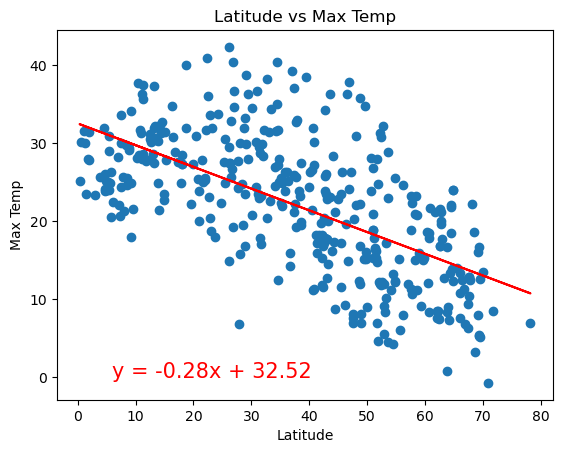

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.6720220238897325


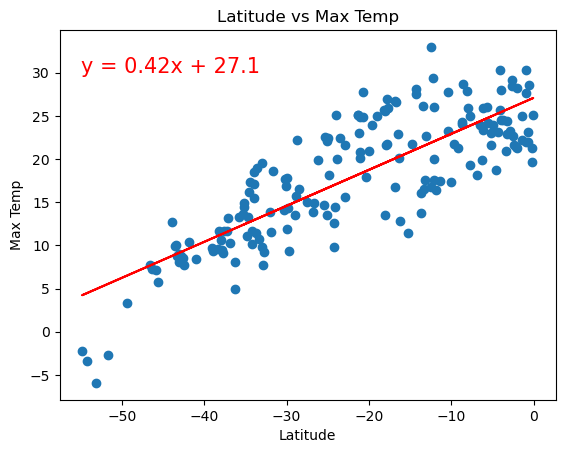

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


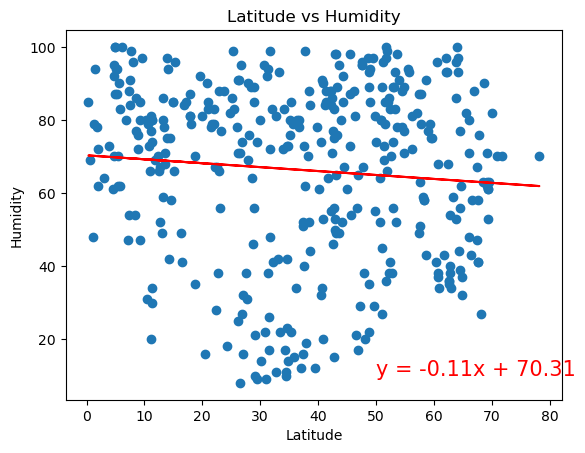

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


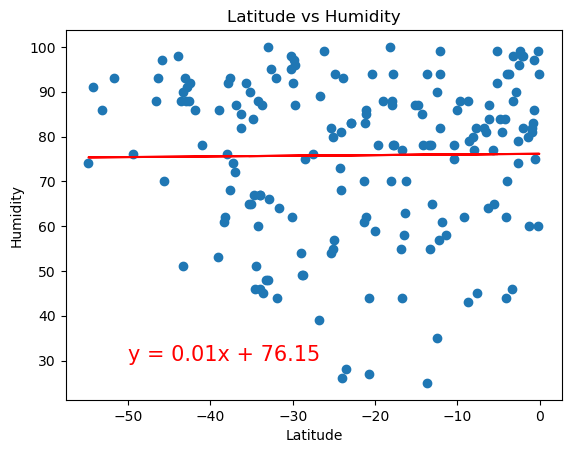

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


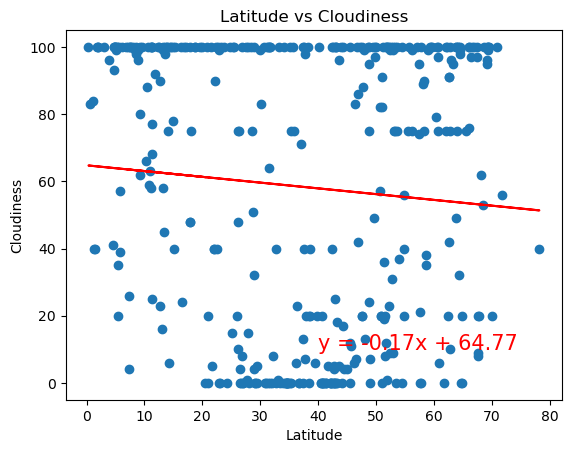

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


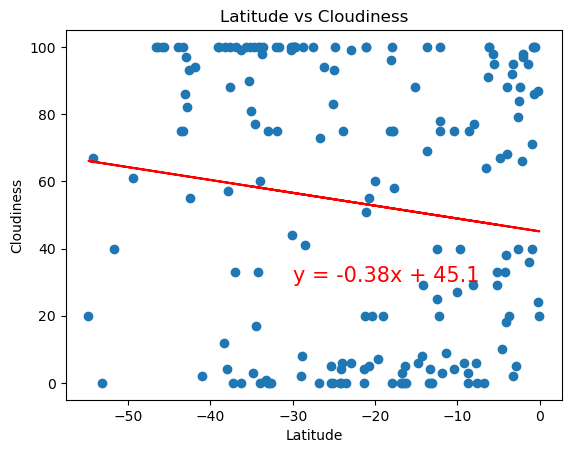

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


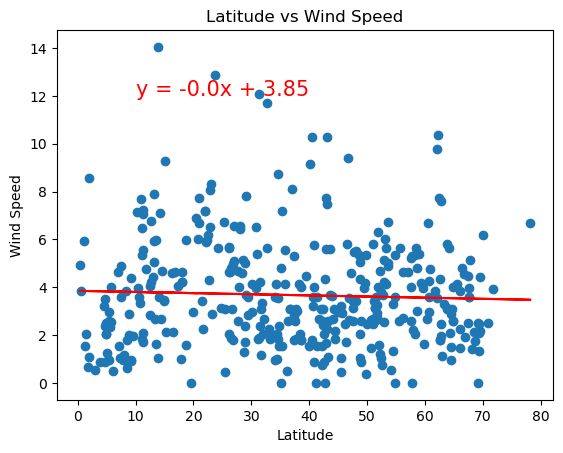

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


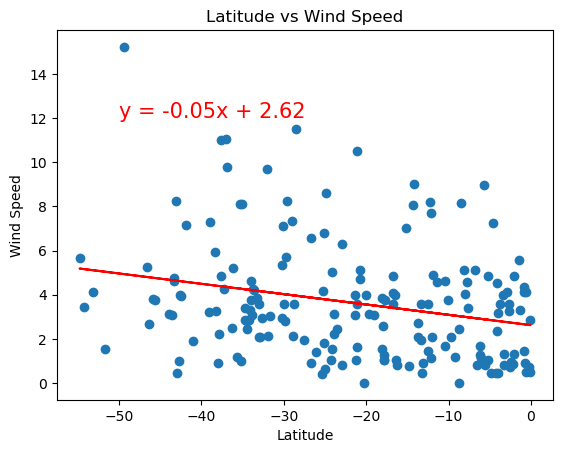

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE